In [1]:
! python3 --version

Python 3.8.19


In [2]:
! pip3 install gym_super_mario_bros==7.3.0 nes_py

# https://pypi.org/project/nespy/
# https://pypi.org/project/gym-super-mario-bros/

In [3]:
! pip3 install gym==0.21.0

In [ ]:
!pip3 install setuptools==65.5.0 "wheel<0.40.0"
!pip3 install gym==0.21.0
#!brew install jpeg libpng libtiff openexr
!pip3 install torch torchvision
!pip3 install 'stable-baselines3[extra]==1.6.0'
!pip3 install opencv-python==4.6.0.66

In [4]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation # less data to process 
from stable_baselines3.common.vec_env import DummyVecEnv # transform the model to pass
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [5]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [6]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

In [7]:
env.action_space

Discrete(256)

In [8]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [9]:
env.action_space

Discrete(7)

In [10]:
env.action_space.sample()

5

In [11]:
env.reset()

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

In [12]:
env.step(1)[3]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

In [13]:
# this launches our mario game with random actions

done = True # Create a flag - restart or not
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the game
        env.reset()
    # Do random actions - step passes the action
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

2024-06-02 13:41:08.659 python[64621:36016532] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fdd6640f6a0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2024-06-02 13:41:08.660 python[64621:36016532] Warning: Expected min height of view: (<NSButton: 0x7fdd65c78860>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2024-06-02 13:41:08.664 python[64621:36016532] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fdd65c92150>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2024-06-02 13:41:08.666 python[64621:36016532] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fdd66244230>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
/opt/miniconda3/envs/ma

KeyboardInterrupt: 

In [15]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls - otherwise we have 256 different options
env = JoypadSpace(env, SIMPLE_MOVEMENT)

state = env.reset()
state.shape

(240, 256, 3)

In [52]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls - otherwise we have 256 different options
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

In [53]:
state = env.reset()

In [54]:
state.shape

(1, 240, 256, 1)

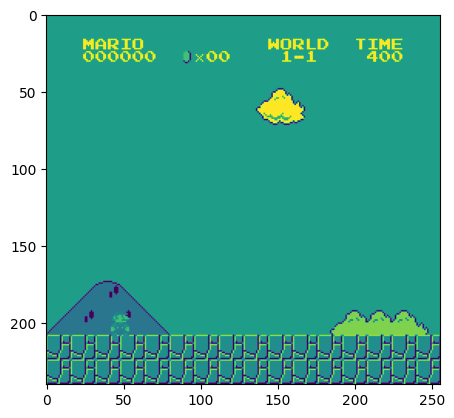

In [56]:
plt.imshow(state[0]);

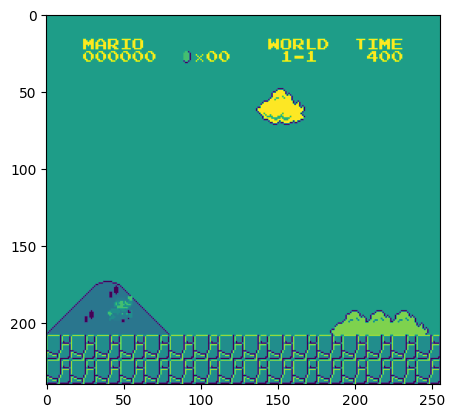

In [61]:
state, reward, done, info = env.step([5])
plt.imshow(state[0]);

In [62]:
from stable_baselines3 import PPO

# This is the AI model started
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log="training/Logs", learning_rate=0.000001, n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [63]:
# log multiple models
import os
from stable_baselines3.common.callbacks import BaseCallback

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [64]:
callback = TrainAndLoggingCallback(check_freq=50000, save_path="training/models")

In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=100000, callback=callback)

Logging to training/Logs/PPO_8
----------------------------
| time/              |     |
|    fps             | 36  |
|    iterations      | 1   |
|    time_elapsed    | 13  |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 5            |
|    iterations           | 2            |
|    time_elapsed         | 171          |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 5.519367e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00445     |
|    learning_rate        | 1e-06        |
|    loss                 | 90.2         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000439    |
|    value_loss           | 287          |
-----------------------------------

In [42]:
# save my model

model.save("training/models/PPO_100k_Mario")

In [43]:
del model

In [45]:
# TEST THE MODEL

# cerate the environment again - dont forget to convert it into black and white
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls - otherwise we have 256 different options
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])

# load your model
model = PPO.load("training/models/PPO_100k_Mario")

# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

# reward how far it can go the right

KeyboardInterrupt: 

In [ ]:
# TRY ANOTHER MODEL

from stable_baselines3 import DQN

model = DQN('CnnPolicy', env, verbose = 1, tensorboard_log=log_path)